In [1]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle, utils, tools, plots

plt.style.use("style.mplstyle")
path_to_save_plots = "/eos/user/j/jcapotor/DUNE-IFIC/Academic/PhD_Thesis/The Temperature Monitoring System for DUNE and its prototypes at CERN/Contents/PDHD/PDHD_OPERATION/pictures/RUN_SUMMARY/"

In [3]:
tini, tend = datetime.datetime(2024, 3, 1, 0, 0, 0), datetime.datetime(2024, 12, 31, 23, 59, 0)
data, data_err = utils.load_data(tini, tend)

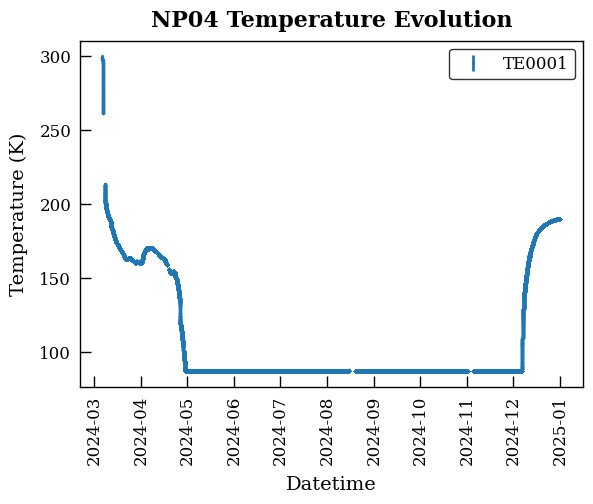

In [24]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data, data_err=data_err, channel="TE0001",
    tmax=300, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes.legend()
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("NP04 Temperature Evolution")
fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0001.png", format="png")

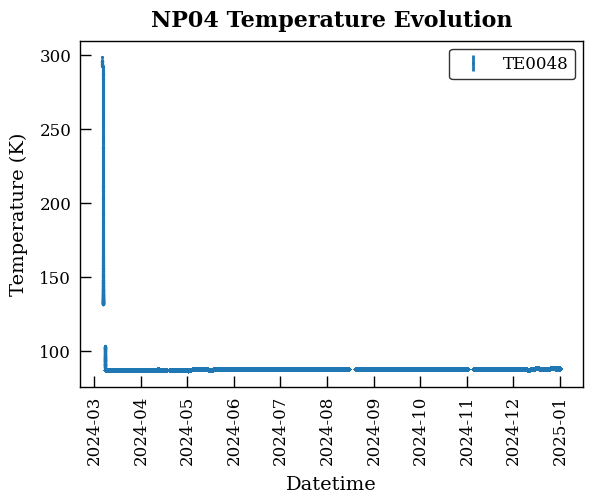

In [25]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data, data_err=data_err, channel="TE0048",
    tmax=300, tmax_err=1,
    axes=axes
)
#axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), label="Recirculation ON", color="red")
#axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), label="Recirculation ON", color="orange")
axes.legend()
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("NP04 Temperature Evolution")
fig.savefig(f"{path_to_save_plots}np04_temp_evolution_TE0048.png", format="png")

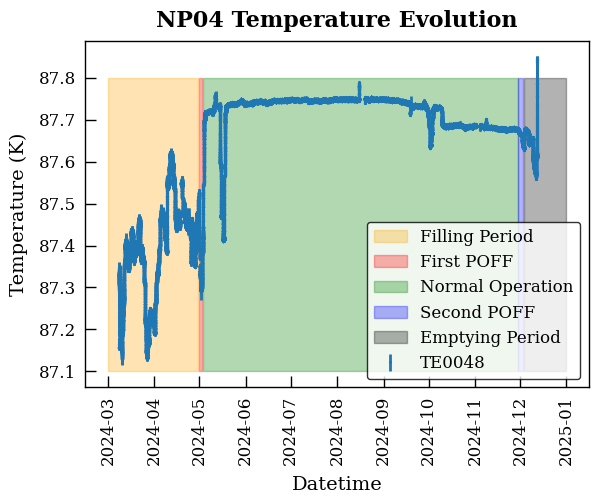

In [26]:
fig, axes = plt.subplots(1, 1)
plots.plot_temp_evolution(
    data=data, data_err=data_err, channel="TE0048",
    tmin=87.0, tmax=87.85, tmax_err=5e-2,
    axes=axes
)

start_filling = datetime.datetime(2024, 3, 1, 0, 0, 0)
end_filling = datetime.datetime(2024, 4, 30, 13, 45, 0)
dates_filling = [start_filling + datetime.timedelta(days=i) for i in range((end_filling - start_filling).days + 1)]
axes.fill_between(dates_filling, y1=87.1, y2=87.8, alpha=0.3, color="orange", label="Filling Period")

start_first_poff = datetime.datetime(2024, 4, 30, 14, 45, 0)
end_first_poff = datetime.datetime(2024, 5, 3, 13, 30, 0)
dates_first_poff = [start_first_poff + datetime.timedelta(days=i) for i in range((end_first_poff - start_first_poff).days + 1)]
axes.fill_between(dates_first_poff, y1=87.1, y2=87.8, alpha=0.3, color="red", label="First POFF")

start_normal = datetime.datetime(2024, 5, 3, 13, 30, 0)
end_normal = datetime.datetime(2024, 11, 29, 23, 0, 0)
dates_normal= [start_normal + datetime.timedelta(days=i) for i in range((end_normal - start_normal).days + 1)]
axes.fill_between(dates_normal, y1=87.1, y2=87.8, alpha=0.3, color="green", label="Normal Operation")

start_second_poff = datetime.datetime(2024, 11, 29, 23, 0, 0)
end_second_poff = datetime.datetime(2024, 12, 3, 14, 30, 0)
dates_second_poff = [start_second_poff + datetime.timedelta(days=i) for i in range((end_second_poff - start_second_poff).days + 1)]
axes.fill_between(dates_second_poff, y1=87.1, y2=87.8, alpha=0.3, color="blue", label="Second POFF")

start_empty = datetime.datetime(2024, 12, 3, 14, 30, 0)
end_empty = datetime.datetime(2024, 12, 31, 23, 59, 0)
dates_empty = [start_empty + datetime.timedelta(days=i) for i in range((end_empty - start_empty).days + 1)]
axes.fill_between(dates_empty, y1=87.1, y2=87.8, alpha=0.3, color="black", label="Emptying Period")

axes.legend()
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature (K)")
axes.set_title("NP04 Temperature Evolution")
fig.savefig(f"{path_to_save_plots}np04_temp_evolution_regions_TE0001.png", format="png")